## Install Libraries and Data

In [4]:
# Install Libraries
import pandas as pd
import numpy as np
import networkx as nx
import os 
import matplotlib.pyplot as plt
import pyvis
from pyvis.network import Network
import seaborn as sns
from cdlib import algorithms

Note: to be able to use all crisp methods, you need to install some additional packages:  {'wurlitzer', 'infomap', 'graph_tool'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'ASLPAw', 'pyclustering'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'wurlitzer', 'infomap'}


In [5]:
# Import Files
countries = pd.read_pickle(r'../Data/relationships.pkl')

## Network Visualisation

In [8]:
# Create graph from dataframe
G = nx.from_pandas_edgelist(countries,
                           source='source',
                           target='target',
                           edge_attr='value',
                           create_using=nx.Graph())

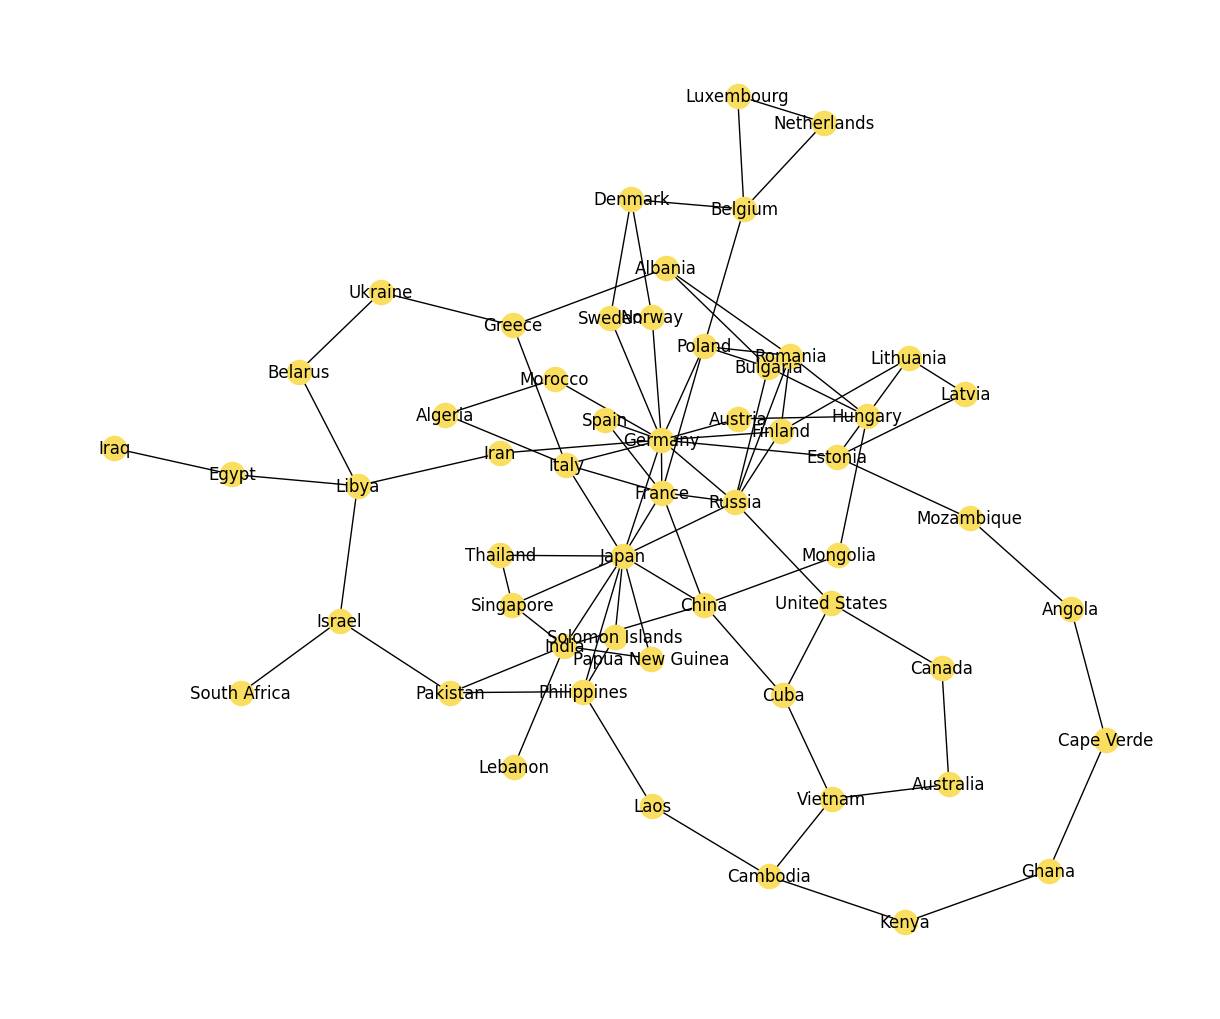

In [10]:
# Plot the network graph
plt.figure(figsize=(12, 10))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, with_labels=True, node_color='#FADE5F', edge_cmap=plt.cm.Reds, pos=pos)

In [12]:
# Define net object for interactive visualisation 
net = Network()
net = Network(notebook=True, width='900px', height='800px', bgcolor='#222222', font_color='White')

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


In [14]:
# Define nodes from G object
node_degree = dict(G.degree)

In [16]:
# Set up node size attributes
nx.set_node_attributes(G, node_degree, 'size')
net.from_nx(G)
net.show_buttons(filter_=True)
net.repulsion()
net.show('20th_century.html')

## Community Detection

In [18]:
# Apply Leiden algorithm to G
coms = algorithms.leiden(G)

In [20]:
new_com = coms.to_node_community_map()

In [22]:
# Put into dictionary
dict_coms = {k:v[0] for k, v in new_com.items()}

In [121]:
# Communities network graph
nx.set_node_attributes(G, dict_coms, 'group')
com_net = Network(notebook= True, width='1300px', height='700px', bgcolor='#222222', font_color='White')
com_net.from_nx(G)
com_net.show_buttons(filter_=True)
com_net.repulsion()
com_net.show('key_communities.html')

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


The communities represented in the graph significantly reflect the text's focus primarily on the military events that characterized the 20th century, specifically the two world wars. For this reason, Germany plays a central role within the Western community, and Japan within the Eastern community. It is surprising that the United States is part of a more restricted core with few ties to the two predominant ones; this is likely due to a greater focus on the Vietnam War compared to other events that saw the presence of the United States throughout the 20th century.

## Centrality Measures

In [24]:
# Degree Centrality
deg_cent = nx.degree_centrality(G)

In [26]:
# Put into dataframe
degree_c = pd.DataFrame(list(deg_cent.items()), columns=['Node', 'Degree'])

In [28]:
# Sort values by degree centrality
degree_c = degree_c.sort_values(by='Degree', ascending=False)

In [30]:
# Color palette
palette = sns.color_palette('light:#ffa756_r', n_colors=60)

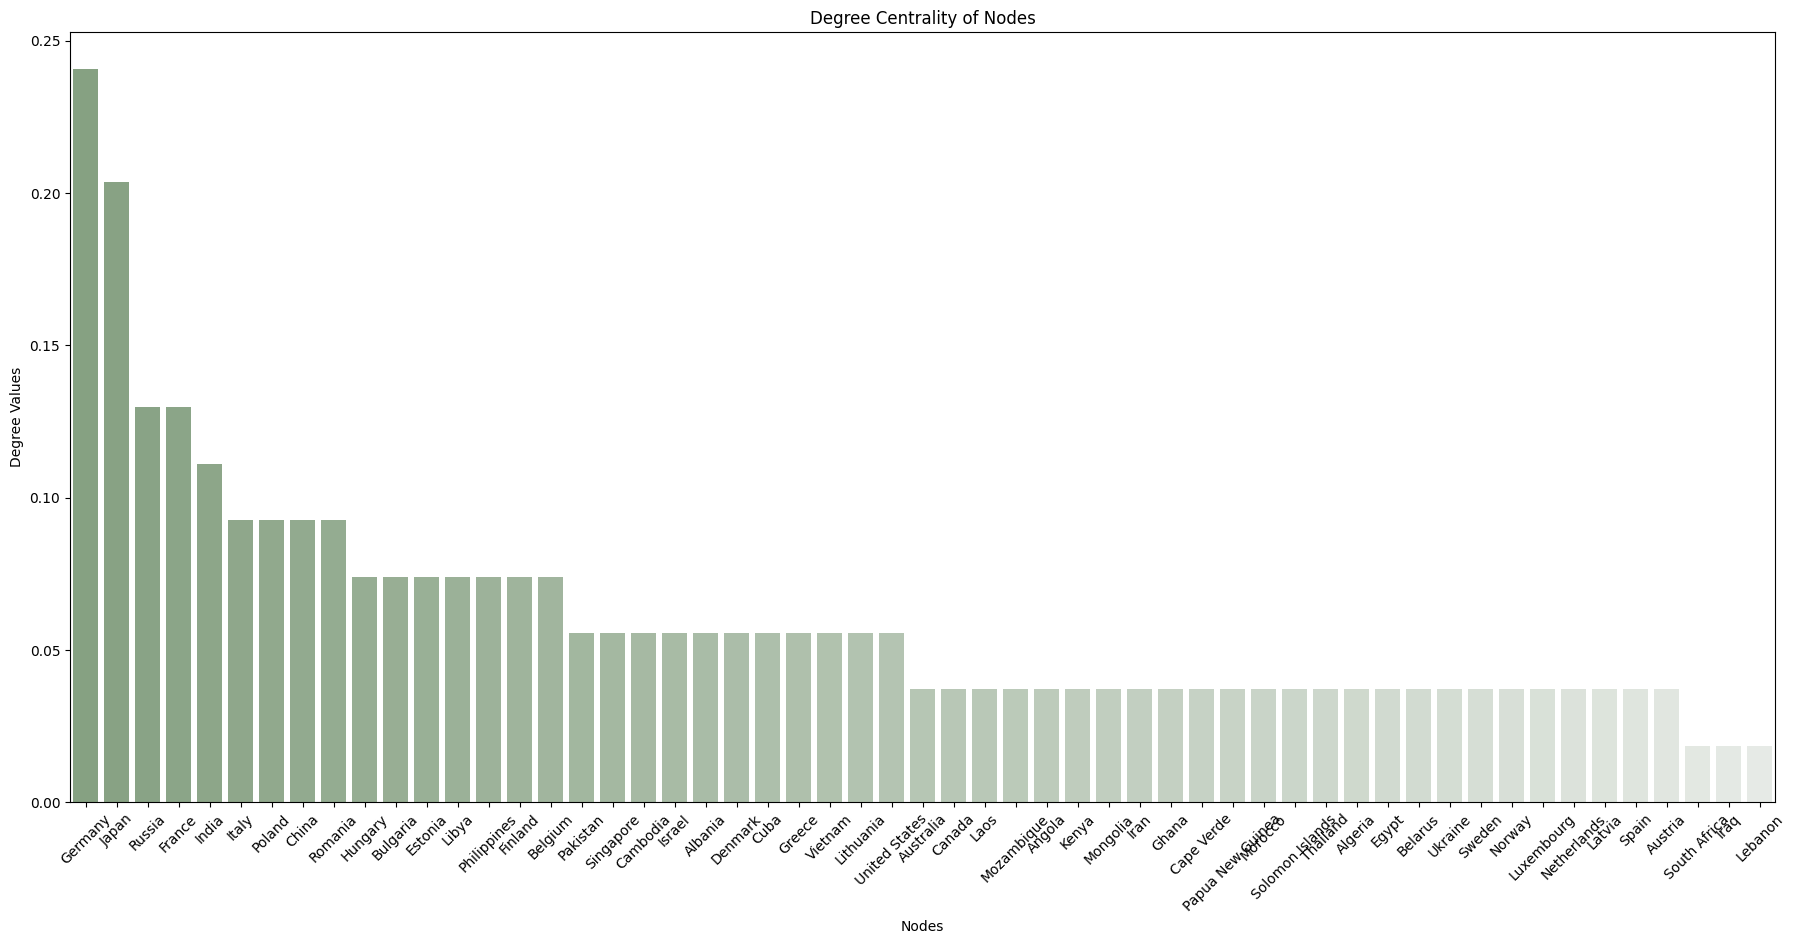

In [68]:
# Create bar plot
plt.figure(figsize=(22, 10))
sns.barplot(data=degree_c, x='Node', y='Degree', palette=palette)
plt.xlabel('Nodes')
plt.ylabel('Degree Values')
plt.title('Degree Centrality of Nodes')
plt.xticks(rotation=45)
plt.show()

In [50]:
# Closeness Centrality
close_cent = nx.closeness_centrality(G)

In [52]:
# Put into dataframe
close_c = pd.DataFrame(list(close_cent.items()), columns=['Node', 'Closeness'])

In [54]:
# Sort values by closeness centrality
close_c = close_c.sort_values(by='Closeness', ascending=False)

In [84]:
# Color palette
palette = sns.color_palette('light:#f9bc08_r', n_colors=60)

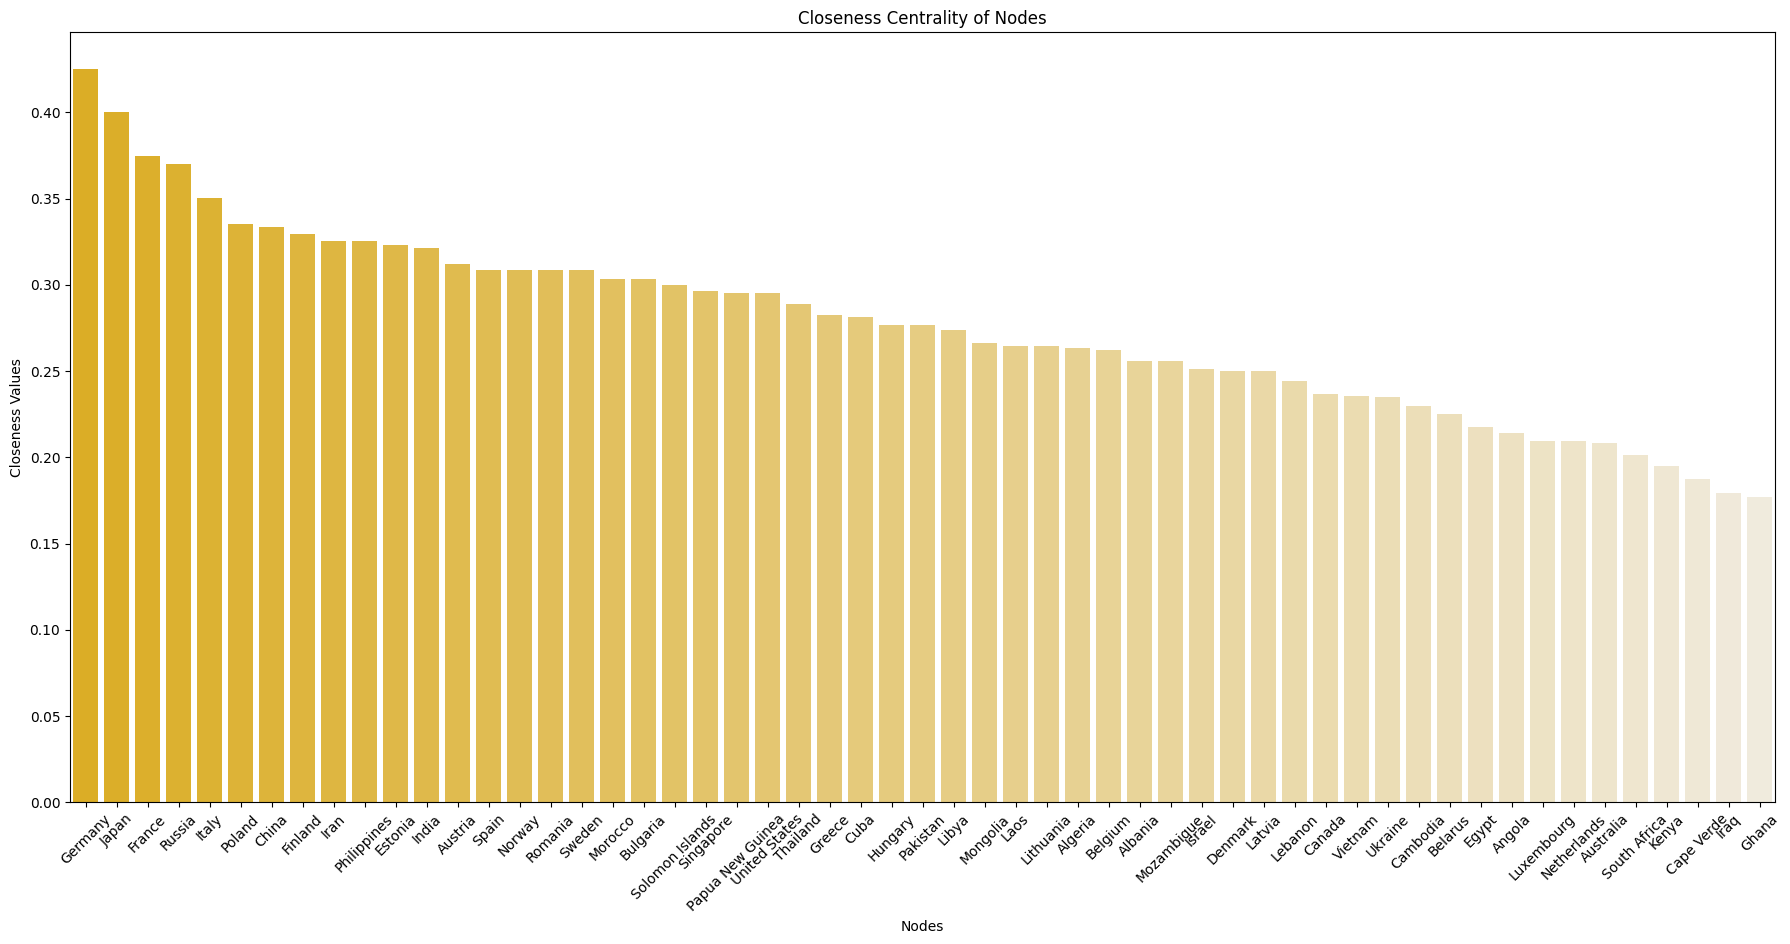

In [86]:
# Plot closeness
plt.figure(figsize=(22, 10))
sns.barplot(data=close_c, x='Node', y='Closeness', palette=palette)
plt.xlabel('Nodes')
plt.ylabel('Closeness Values')
plt.title('Closeness Centrality of Nodes')
plt.xticks(rotation=45)
plt.show()

In [34]:
# Betweenness Centrality
betw_cent = nx.betweenness_centrality(G)

In [36]:
# Put into dataframe
betw_c = pd.DataFrame(list(betw_cent.items()), columns=['Node', 'Betweenness'])

In [38]:
# Sort values by betweenness centrality
betw_c = betw_c.sort_values(by='Betweenness', ascending=False)

In [89]:
# Color Palette
palette = sns.color_palette('light:#ff7855_r', n_colors=60)

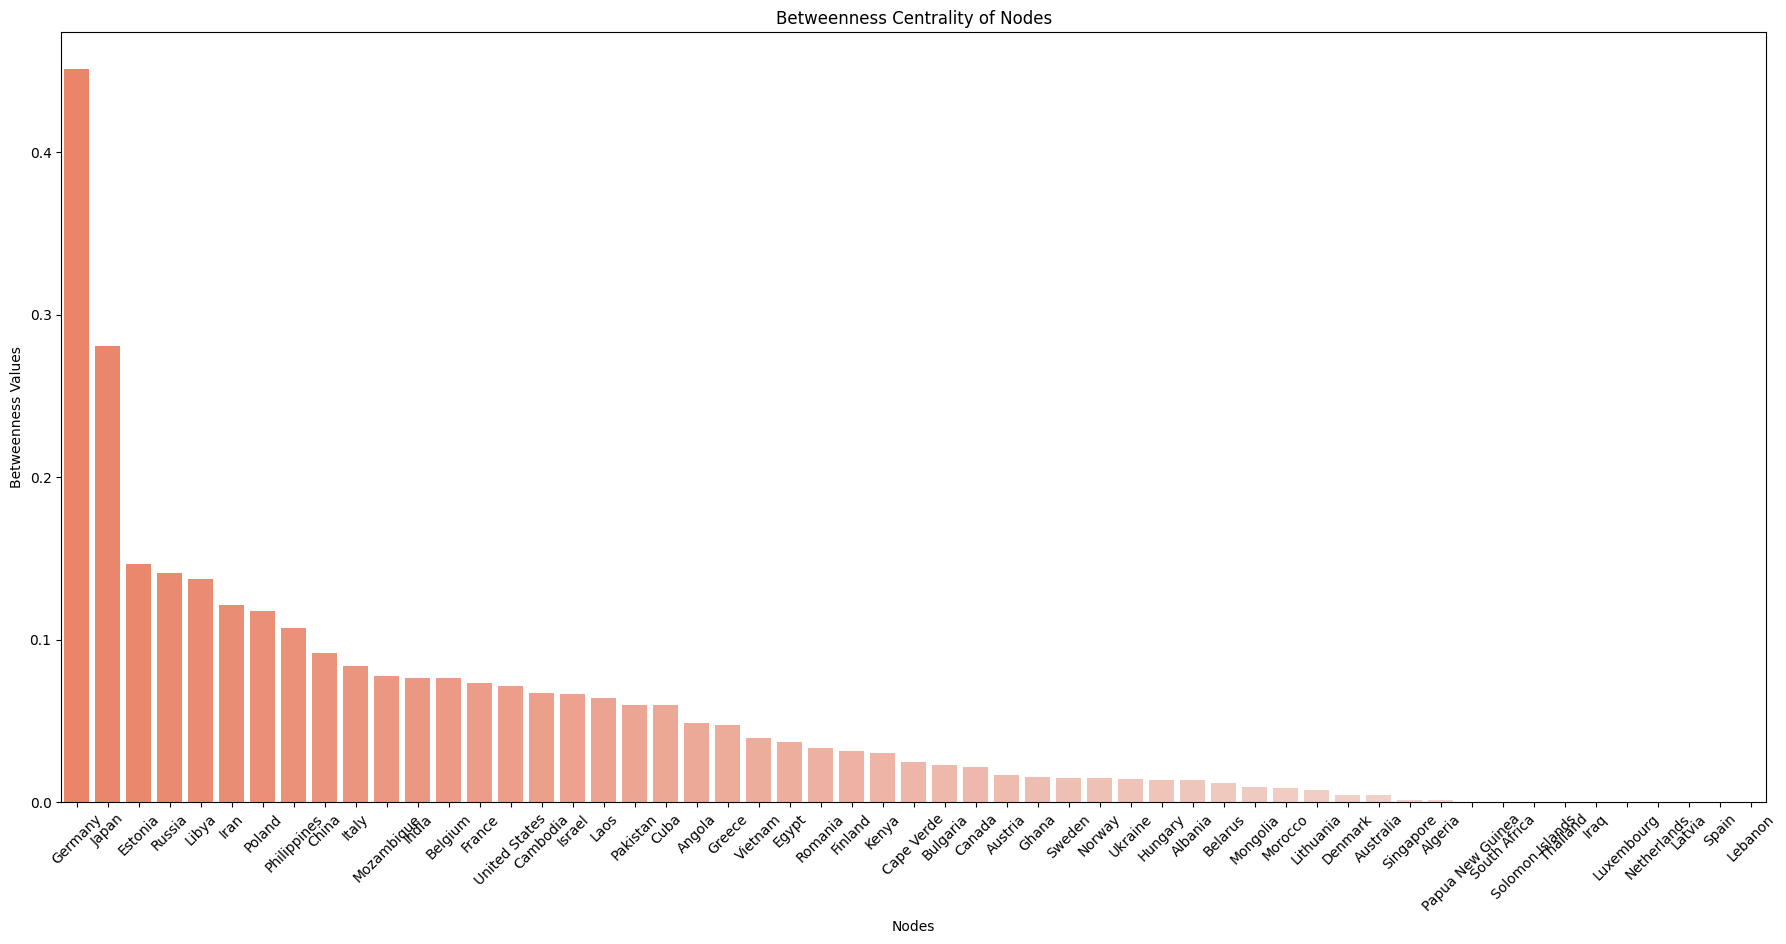

In [91]:
# Plot betweenness
plt.figure(figsize=(22, 10))
sns.barplot(data=betw_c, x='Node', y='Betweenness', palette=palette)
plt.xlabel('Nodes')
plt.ylabel('Betweenness Values')
plt.title('Betweenness Centrality of Nodes')
plt.xticks(rotation=45)
plt.show()

Germany, Japan, and Russia are the three nations with the highest level of centrality, which is not surprising given that they are among the three countries that played a significant role in the world conflicts. A similar discourse applies to 'closeness,' largely reflecting historical alliances. As previously mentioned, it is surprising that the United States does not hold a more prominent position despite its significant military presence during much of the conflicts of the 20th century. The graph related to 'betweenness centrality' shows a broader landscape of connections among various geographical communities, likely reflecting dynamics that are not strictly related to the military history of the 20th century.